Sentiment Analysis On Elon Musk.csv

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [2]:
nw=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Text-Mining/negative-words.txt',sep='|', encoding='latin-1')
nw

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4811,zaps
4812,zealot
4813,zealous
4814,zealously


In [3]:
nw.columns

Index([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'], dtype='object')

In [4]:
nw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'w'},inplace=True)

In [5]:
nw.columns

Index(['w'], dtype='object')

PreProcessing Data

In [6]:
nw=[w.strip() for w in nw.w] # remove both the leading and the trailing characters
nw=[w for w in nw if w] # removes empty strings, because they are considered in Python as False
nw[0:10]

[';',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';']

In [7]:
nw_text=' '.join(nw)
nw_text

'; ; Opinion Lexicon: Negative ; ; This file contains a list of NEGATIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list, please cite one of the following two papers: ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ;       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ;       Washington, USA, ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ;       and Comparing Opinions on the Web." Proceedings of the 14th ;       International World Wide Web conference (WWW-2005), May 10-14, ;       2005, Chiba, Japan. ; ; Notes: ;    1. The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion. ;       See the paper below: ; ;       Bing Liu. "Sent

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
nw_tokens=tknzr.tokenize(nw_text)
print(nw_tokens)

[';', ';', 'Opinion', 'Lexicon', ':', 'Negative', ';', ';', 'This', 'file', 'contains', 'a', 'list', 'of', 'NEGATIVE', 'opinion', 'words', '(', 'or', 'sentiment', 'words', ')', '.', ';', ';', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', ';', 'http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', ';', 'If', 'you', 'use', 'this', 'list', ',', 'please', 'cite', 'one', 'of', 'the', 'following', 'two', 'papers', ':', ';', ';', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', '.', '"', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', '.', '"', ';', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', ';', 'Discovery', 'and', 'Data', 'Mining', '(', 'KDD', '-', '2004', ')', ',', 'Aug', '22-25', ',', '2004', ',', 'Seattle', ',', ';', 'Washington', ',', 'USA', ',', ';', 'Bing', 'Liu', ',', 'Minqing', 'Hu', 'and', 'Junsheng', 'Cheng', '.', '"', 'Opinion', 'Observer', ':', 'Analyzing', ';', 'and', 'Comparing', 'Opi

In [9]:
nw_tokens_text=' '.join(nw_tokens)
nw_tokens_text

'; ; Opinion Lexicon : Negative ; ; This file contains a list of NEGATIVE opinion words ( or sentiment words ) . ; ; This file and the papers can all be downloaded from ; http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list , please cite one of the following two papers : ; ; Minqing Hu and Bing Liu . " Mining and Summarizing Customer Reviews . " ; Proceedings of the ACM SIGKDD International Conference on Knowledge ; Discovery and Data Mining ( KDD - 2004 ) , Aug 22-25 , 2004 , Seattle , ; Washington , USA , ; Bing Liu , Minqing Hu and Junsheng Cheng . " Opinion Observer : Analyzing ; and Comparing Opinions on the Web . " Proceedings of the 14th ; International World Wide Web conference ( WWW - 2005 ) , May 10-14 , ; 2005 , Chiba , Japan . ; ; Notes : ; 1 . The appearance of an opinion word in a sentence does not necessarily ; mean that the sentence expresses a positive or negative opinion . ; See the paper below : ; ; Bing Liu . " Sentiment Analysis and Subj

In [10]:
no_punc_text=nw_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'  Opinion Lexicon  Negative   This file contains a list of NEGATIVE opinion words  or sentiment words     This file and the papers can all be downloaded from  httpwwwcsuiceduliubFBSsentimentanalysishtml   If you use this list  please cite one of the following two papers    Minqing Hu and Bing Liu   Mining and Summarizing Customer Reviews    Proceedings of the ACM SIGKDD International Conference on Knowledge  Discovery and Data Mining  KDD  2004   Aug 2225  2004  Seattle   Washington  USA   Bing Liu  Minqing Hu and Junsheng Cheng   Opinion Observer  Analyzing  and Comparing Opinions on the Web   Proceedings of the 14th  International World Wide Web conference  WWW  2005   May 1014   2005  Chiba  Japan    Notes   1  The appearance of an opinion word in a sentence does not necessarily  mean that the sentence expresses a positive or negative opinion   See the paper below    Bing Liu   Sentiment Analysis and Subjectivity   An chapter in  Handbook of Natural Language Processing  Second Edit

In [11]:
import re
no_url_text=re.sub(r'http\S+','',no_punc_text)
no_url_text

'  Opinion Lexicon  Negative   This file contains a list of NEGATIVE opinion words  or sentiment words     This file and the papers can all be downloaded from     If you use this list  please cite one of the following two papers    Minqing Hu and Bing Liu   Mining and Summarizing Customer Reviews    Proceedings of the ACM SIGKDD International Conference on Knowledge  Discovery and Data Mining  KDD  2004   Aug 2225  2004  Seattle   Washington  USA   Bing Liu  Minqing Hu and Junsheng Cheng   Opinion Observer  Analyzing  and Comparing Opinions on the Web   Proceedings of the 14th  International World Wide Web conference  WWW  2005   May 1014   2005  Chiba  Japan    Notes   1  The appearance of an opinion word in a sentence does not necessarily  mean that the sentence expresses a positive or negative opinion   See the paper below    Bing Liu   Sentiment Analysis and Subjectivity   An chapter in  Handbook of Natural Language Processing  Second Edition    editors  N  Indurkhya and F  J  Dame

In [12]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'a', 'list', 'of', 'NEGATIVE', 'opinion', 'words', 'or', 'sentiment', 'words', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', 'If', 'you', 'use', 'this', 'list', 'please', 'cite', 'one', 'of', 'the', 'following', 'two', 'papers', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', 'Discovery', 'and', 'Data', 'Mining', 'KDD', '2004', 'Aug', '2225', '2004', 'Seattle', 'Washington', 'USA', 'Bing', 'Liu', 'Minqing', 'Hu', 'and', 'Junsheng', 'Cheng', 'Opinion', 'Observer', 'Analyzing', 'and', 'Comparing', 'Opinions', 'on', 'the', 'Web', 'Proceedings', 'of', 'the', '14th', 'International', 'World', 'Wide', 'Web', 'conference', 'WWW', '2005', 'May', '1014', '2005', 'Chiba', 'Japan', 'Notes', '1', 'The', 'appearance', 'of', 'an', 'opinion', 'word', 'in', 'a', 'se

In [14]:
len(text_tokens)

4968

In [15]:
#remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Opinion', 'Lexicon', 'Negative', 'This', 'file', 'contains', 'list', 'NEGATIVE', 'opinion', 'words', 'sentiment', 'words', 'This', 'file', 'papers', 'downloaded', 'If', 'use', 'list', 'please', 'cite', 'one', 'following', 'two', 'papers', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'ACM', 'SIGKDD', 'International', 'Conference', 'Knowledge', 'Discovery', 'Data', 'Mining', 'KDD', '2004', 'Aug', '2225', '2004', 'Seattle', 'Washington', 'USA', 'Bing', 'Liu', 'Minqing', 'Hu', 'Junsheng', 'Cheng', 'Opinion', 'Observer', 'Analyzing', 'Comparing', 'Opinions', 'Web', 'Proceedings', '14th', 'International', 'World', 'Wide', 'Web', 'conference', 'WWW', '2005', 'May', '1014', '2005', 'Chiba', 'Japan', 'Notes', '1', 'The', 'appearance', 'opinion', 'word', 'sentence', 'necessarily', 'mean', 'sentence', 'expresses', 'positive', 'negative', 'opinion', 'See', 'paper', 'Bing', 'Liu', 'Sentiment', 'Analysis', 'Subjectivity', 'An', 'chapter', 'Handbook

In [16]:
#Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['natural', 'language', 'processing', 'second', 'edition', 'editors', 'n', 'indurkhya', 'f', 'j', 'damerau', '2010', '2', 'you', 'notice', 'many', 'misspelled', 'words', 'list', 'they', 'mistakes', 'they', 'included', 'misspelled', 'words', 'appear', 'frequently', 'social', 'media', 'content', '2', 'faced', '2', 'faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absentminded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish'

In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['natur', 'languag', 'process', 'second', 'edit', 'editor', 'n', 'indurkhya', 'f', 'j', 'damerau', '2010', '2', 'you', 'notic', 'mani', 'misspel', 'word', 'list', 'they', 'mistak', 'they', 'includ', 'misspel', 'word', 'appear', 'frequent', 'social', 'media', 'content', '2', 'face', '2', 'face', 'abnorm', 'abolish', 'abomin', 'abomin', 'abomin', 'abomin', 'abort', 'abort', 'abort', 'abrad', 'abras', 'abrupt', 'abruptli', 'abscond', 'absenc', 'absentmind', 'absente', 'absurd', 'absurd', 'absurdli', 'absurd', 'abus', 'abus', 'abus', 'abus', 'abysm', 'abysm', 'abyss', 'accident', 'accost', 'accurs', 'accus', 'accus', 'accus', 'accus', 'accus', 'accusingli', 'acerb', 'acerb', 'acerb', 'ach', 'ach', 'ach', 'achey', 'ach', 'acrid', 'acridli', 'acrid', 'acrimoni', 'acrimoni', 'acrimoni', 'adam', 'adamantli', 'addict', 'addict', 'addict', 'addict', 'admonish', 'admonish', 'admonishingli', 'admonish', 'admonit', 'adulter', 'adulter', 'adulter', 'adulteri']


In [18]:
#Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

opinion lexicon negative this file contains list negative opinion words sentiment words this file papers downloaded if use list please cite one following two papers minqing hu bing liu mining summarizing customer reviews proceedings acm sigkdd international conference knowledge discovery data mining kdd 2004 aug 2225 2004 seattle washington usa bing liu minqing hu junsheng cheng opinion observer analyzing comparing opinions web proceedings 14th international world wide web conference www 2005 may 1014 2005 chiba japan notes 1 the appearance opinion word sentence necessarily mean sentence expresses positive negative opinion see paper bing liu sentiment analysis subjectivity an chapter handbook natural language processing second edition editors n indurkhya f j damerau 2010 2 you notice many misspelled words list they mistakes they included misspelled words appear frequently social media content 2 faced 2 faces abnormal abolish abominable abominably abominate abomination abort aborted abo

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['opinion', 'lexicon', 'negative', 'this', 'file', 'contain', 'list', 'negative', 'opinion', 'word', 'sentiment', 'word', 'this', 'file', 'paper', 'download', 'if', 'use', 'list', 'please', 'cite', 'one', 'follow', 'two', 'paper', 'minqe', 'hu', 'bing', 'liu', 'mining', 'summarize', 'customer', 'review', 'proceeding', 'acm', 'sigkdd', 'international', 'conference', 'knowledge', 'discovery', 'datum', 'mining', 'kdd', '2004', 'aug', '2225', '2004', 'seattle', 'washington', 'usa', 'bing', 'liu', 'minqe', 'hu', 'junsheng', 'cheng', 'opinion', 'observer', 'analyze', 'compare', 'opinion', 'web', 'proceeding', '14th', 'international', 'world', 'wide', 'web', 'conference', 'www', '2005', 'may', '1014', '2005', 'chiba', 'japan', 'note', '1', 'the', 'appearance', 'opinion', 'word', 'sentence', 'necessarily', 'mean', 'sentence', 'express', 'positive', 'negative', 'opinion', 'see', 'paper', 'bing', 'liu', 'sentiment', 'analysis', 'subjectivity', 'an', 'chapter', 'handbook', 'natural', 'language', 

In [20]:
clean_nw=' '.join(lemmas)
clean_nw

'opinion lexicon negative this file contain list negative opinion word sentiment word this file paper download if use list please cite one follow two paper minqe hu bing liu mining summarize customer review proceeding acm sigkdd international conference knowledge discovery datum mining kdd 2004 aug 2225 2004 seattle washington usa bing liu minqe hu junsheng cheng opinion observer analyze compare opinion web proceeding 14th international world wide web conference www 2005 may 1014 2005 chiba japan note 1 the appearance opinion word sentence necessarily mean sentence express positive negative opinion see paper bing liu sentiment analysis subjectivity an chapter handbook natural language processing second edition editor n indurkhya f j damerau 2010 2 you notice many misspelled word list they mistake they include misspelled word appear frequently social medium content 2 face 2 face abnormal abolish abominable abominably abominate abomination abort abort abort abrade abrasive abrupt abruptl

Feature Extraction

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
nwcv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'opinion': 2677, 'lexicon': 2316, 'negative': 2592, 'this': 3614, 'file': 1381, 'contain': 583, 'list': 2331, 'word': 4060, 'sentiment': 3220, 'paper': 2759, 'download': 1131, 'if': 1760, 'use': 3940, 'please': 2844, 'cite': 504, 'one': 2672, 'follow': 1422, 'two': 3701, 'minqe': 2455, 'hu': 1731, 'bing': 294, 'liu': 2335, 'mining': 2454, 'summarize': 3541, 'customer': 674, 'review': 3067, 'proceeding': 2908, 'acm': 41, 'sigkdd': 3282, 'international': 2129, 'conference': 558, 'knowledge': 2254, 'discovery': 960, 'datum': 693, 'kdd': 2246, '2004': 2, 'aug': 195, '2225': 5, 'seattle': 3194, 'washington': 4015, 'usa': 3939, 'junsheng': 2243, 'cheng': 491, 'observer': 2640, 'analyze': 108, 'compare': 533, 'web': 4030, '14th': 1, 'world': 4062, 'wide': 4045, 'www': 4094, '2005': 3, 'may': 2425, '1014': 0, 'chiba': 492, 'japan': 2215, 'note': 2618, 'the': 3610, 'appearance': 159, 'sentence': 3219, 'necessarily': 2584, 'mean': 2427, 'express': 1274, 'positive': 2868, 'see': 3200, 'analysis'

In [23]:
print(cv.get_feature_names_out()[100:200])

['ambiguous' 'ambivalence' 'ambivalent' 'ambush' 'amiss' 'amputate' 'an'
 'analysis' 'analyze' 'anarchism' 'anarchist' 'anarchistic' 'anarchy'
 'anemic' 'anger' 'angrily' 'angriness' 'angry' 'anguish' 'animosity'
 'annihilate' 'annihilation' 'annoy' 'annoyance' 'annoying' 'annoyingly'
 'anomalous' 'anomaly' 'antagonism' 'antagonist' 'antagonistic'
 'antagonize' 'anti' 'antiamerican' 'antiisraeli' 'antioccupation'
 'antipathy' 'antiproliferation' 'antiquated' 'antisemite' 'antisocial'
 'antithetical' 'antius' 'antiwhite' 'anxiety' 'anxious' 'anxiously'
 'anxiousness' 'apathetic' 'apathetically' 'apathy' 'apocalypse'
 'apocalyptic' 'apologist' 'appal' 'appall' 'appalling' 'appallingly'
 'appear' 'appearance' 'apprehension' 'apprehensive' 'apprehensively'
 'arbitrary' 'arcane' 'archaic' 'arduous' 'arduously' 'argumentative'
 'arrogance' 'arrogant' 'arrogantly' 'ashamed' 'asinine' 'asininely'
 'asinininity' 'askance' 'asperse' 'aspersion' 'assail' 'assassin'
 'assassinate' 'assault' 'assul

In [24]:
print(nwcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(nwcv.toarray().shape)

(4916, 4102)


Generate Word Cloud

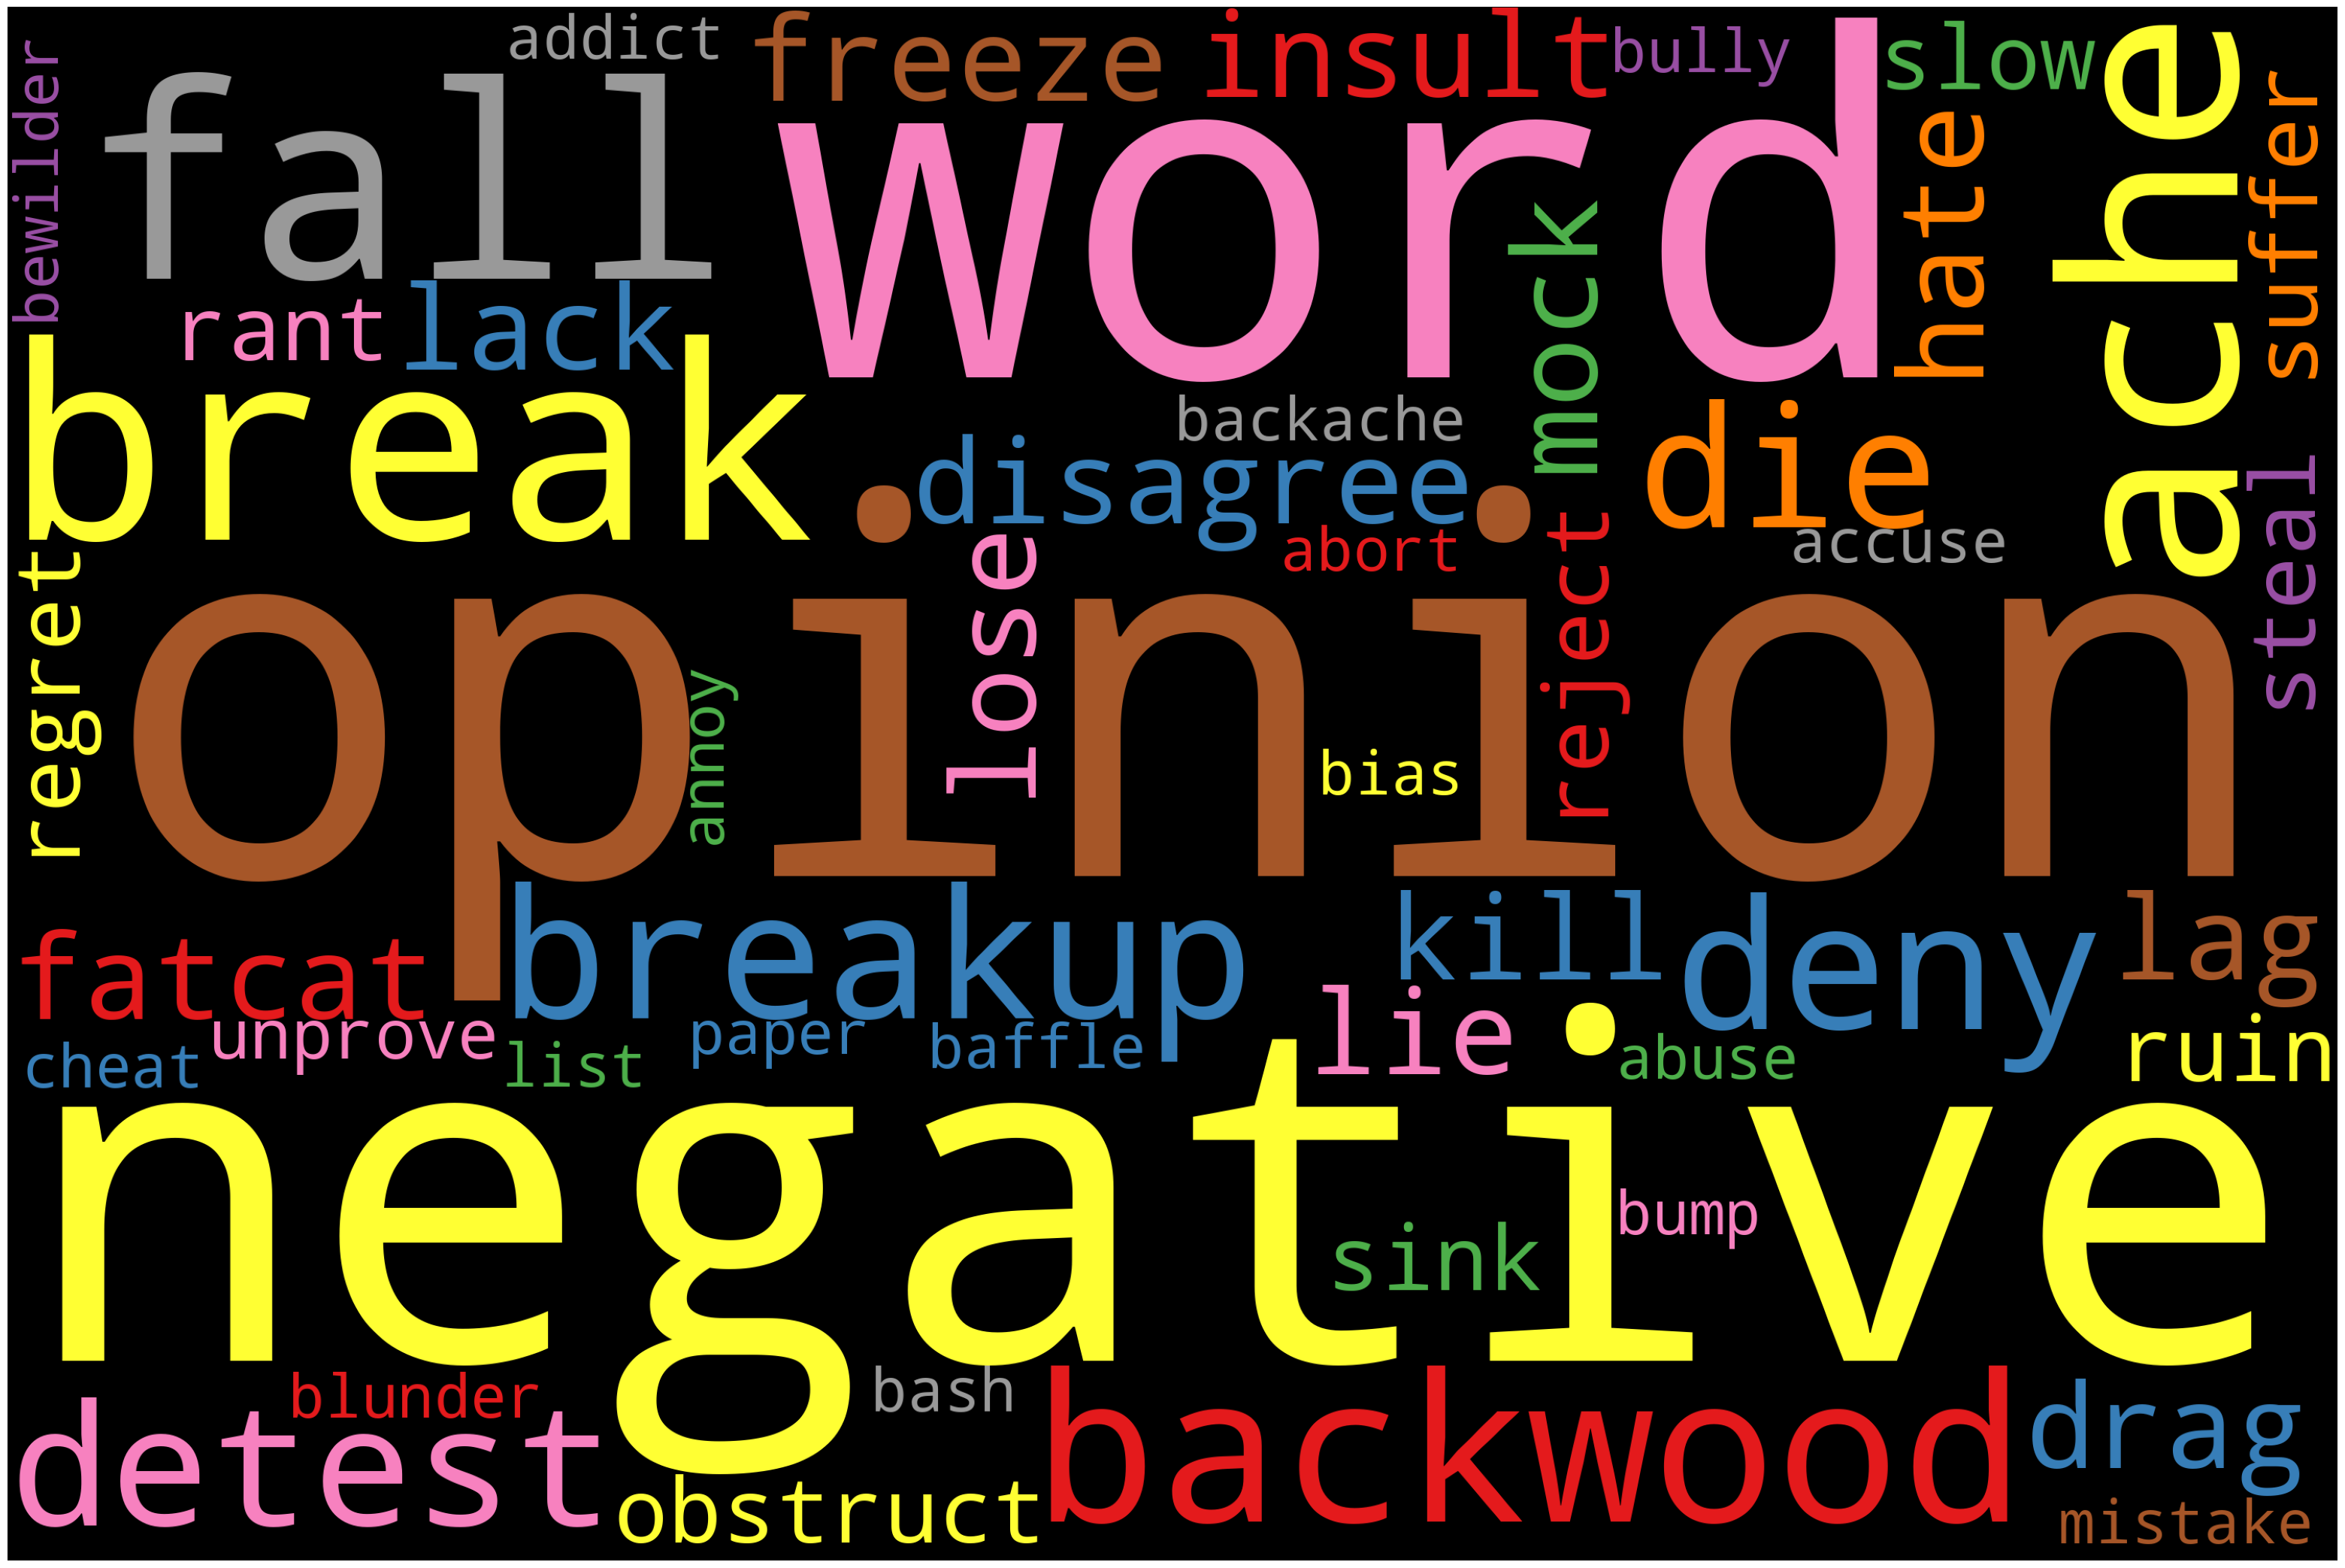

In [26]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_nw)
plot_cloud(wordcloud)

Named Entity Recognition

In [27]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_nw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

Emotion Mining(Sentiment Analysis)

In [28]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(nw))
sentences

['; ; Opinion Lexicon: Negative ; ; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 '; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list, please cite one of the following two papers: ; ;   Minqing Hu and Bing Liu.',
 '"Mining and Summarizing Customer Reviews."',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ;       Washington, USA, ;   Bing Liu, Minqing Hu and Junsheng Cheng.',
 '"Opinion Observer: Analyzing ;       and Comparing Opinions on the Web."',
 'Proceedings of the 14th ;       International World Wide Web conference (WWW-2005), May 10-14, ;       2005, Chiba, Japan.',
 '; ; Notes: ;    1.',
 'The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion.',
 ';       See the paper

In [29]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,; ; Opinion Lexicon: Negative ; ; This file co...
1,; ; This file and the papers can all be downlo...
2,"""Mining and Summarizing Customer Reviews."""
3,; Proceedings of the ACM SIGKDD Internat...
4,"""Opinion Observer: Analyzing ; and Compa..."
5,Proceedings of the 14th ; International ...
6,; ; Notes: ; 1.
7,The appearance of an opinion word in a sentenc...
8,; See the paper below: ; ; Bing Liu.
9,"""Sentiment Analysis and Subjectivity."""


In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def calculate_sentiment(text):
    nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores

text = 'great'
sentiment_scores = calculate_sentiment(text)
print(sentiment_scores)


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is alre

0     {'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'comp...
1     {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7     {'neg': 0.143, 'neu': 0.618, 'pos': 0.239, 'co...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'comp...
13    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
14    {'neg': 0.537, 'neu': 0.456, 'pos': 0.007, 'co...
Name: sentiment_value, dtype: object